In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [11]:
arr = []
fileName = 'clustering_data.csv'
with open(fileName, 'rbU') as csvFile:
    reader = csv.reader(csvFile, delimiter='|', quotechar='"')
    i = -1
    for row in reader:
        i += 1
        if i == 0:
            continue
        arr.append([row[0],row[1]])
data = np.array(arr)
len(data)
data

array([['-78.22470223', '-8.091340154'],
       ['-73.7231019', '-10.74225311'],
       ['-74.7356279', '-12.46014128'],
       ..., 
       ['-76.76102604', '-9.205026685'],
       ['-73.73245966', '-13.97297158'],
       ['-71.4041783', '-12.91229722']],
      dtype='|S12')

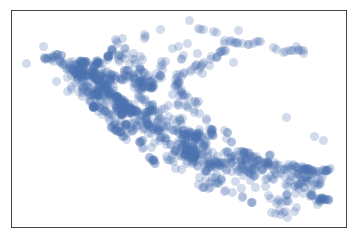

In [12]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [13]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    #print(labels)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)) + ' [{:.2f} s]'.format(end_time - start_time), fontsize=24)
    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    return labels
#plot_clusters(data, cluster.DBSCAN, (), {'eps':0.25})

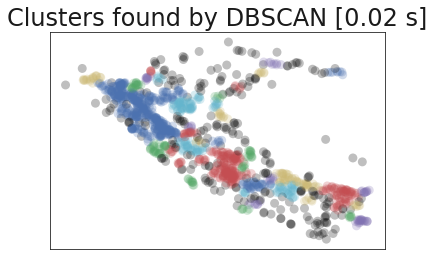

In [17]:
labels = plot_clusters(data, cluster.DBSCAN, (), {'eps':0.25})

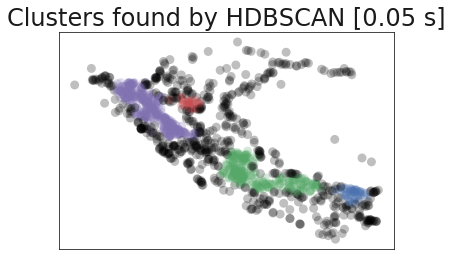

In [15]:
labels = plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':30})

In [35]:
#%colors?
labelCounts = {}
for i in range(len(labels)):
    if labels[i] in labelCounts:
        labelCounts[labels[i]] += 1
    else:
        labelCounts[labels[i]] = 1
labelCountList = [[key, labelCounts[key]] for key in labelCounts]
labelCountList = sorted(labelCountList, key=lambda item: item[1], reverse=True)
for item in labelCountList:
    print item
# cluster.DBSCAN.predict([[0, 0], [4, 4]])
#for i in range(len(data.T[0])):
#    print 

[0, 339]
[-1, 232]
[2, 142]
[14, 67]
[4, 47]
[11, 46]
[5, 35]
[12, 34]
[17, 32]
[7, 29]
[6, 27]
[9, 20]
[19, 18]
[22, 18]
[8, 17]
[1, 13]
[15, 10]
[16, 10]
[25, 10]
[21, 9]
[35, 9]
[3, 8]
[20, 8]
[30, 8]
[36, 8]
[24, 7]
[27, 7]
[31, 7]
[39, 7]
[10, 6]
[13, 6]
[26, 6]
[28, 6]
[29, 6]
[38, 6]
[41, 6]
[42, 6]
[18, 5]
[23, 5]
[32, 5]
[33, 5]
[34, 5]
[37, 5]
[43, 5]
[44, 5]
[40, 4]


In [19]:
with open('_' + fileName, 'w') as csvFile2:
    with open(fileName, 'rbU') as csvFile:
        reader = csv.reader(csvFile, delimiter='|', quotechar='"')
        i = -1
        for row in reader:
            i += 1
            if i == 0:
                csvFile2.write('|'.join(row) + '|cluster_label\n')
                continue
            csvFile2.write('|'.join(row) + '|' + str(labels[i - 1]) + '\n')

In [20]:
np.shape(labels)

(1316,)

In [21]:
labels

array([ 0,  1,  2, ...,  0, 12, -1])